# W5 Lab Assignment

This lab covers some fundamental plots of 1-D data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_style('white')

%matplotlib inline 

# Q1 1-D Scatter Plot


Remember that you can use not only the real data, but also fake data if you want to play with visualization tools. Actually it is a nice way to experiment because you can control every aspect of data. Let's create some random numbers. 

The function [**`np.random.randn()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) generates a sample with size $N$ from the [standard normal distribution](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution).

In [2]:
def generate_many_numbers(N=10, mean=5, sigma=3):
    return mean + sigma * np.random.randn(N)  # generate a normally distributed numbers

The most immediate method to visualize 1-D data is just plotting it. [**`np.zeros_like(data)`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html) creates a numpy array (list) that have the same dimension as the argument. 

In [3]:
data = generate_many_numbers(N=10)
print(data)
print(np.zeros_like(data))

[ 2.91629489  4.49535026  7.49840974  6.03066234  4.63031263  4.30713191
  3.69859163  6.56586348  3.07881695  2.82790962]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


[**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) does the scatter plot job.

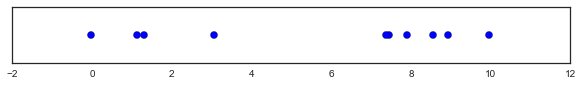

In [49]:
plt.figure(figsize=(10,1))
plt.scatter(data, np.zeros_like(data) + 0., s=50)
plt.gca().axes.get_yaxis().set_visible(False) # set y axis invisible

If we have more numbers?

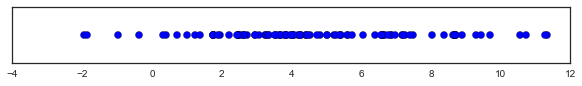

In [50]:
data = generate_many_numbers(N=100)
plt.figure(figsize=(10,1))
plt.scatter(data, np.zeros_like(data) + 0., s=50)
plt.gca().axes.get_yaxis().set_visible(False)

Of course you can't see much at the center. We can add "jitters" using [`np.random.rand()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html) function.  

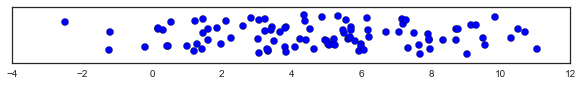

In [52]:
data = generate_many_numbers(N=100)

# Implement this
# zittered_ypos = ??

plt.figure(figsize=(10,1))
plt.scatter(data, zittered_ypos, s=50)
plt.gca().axes.get_yaxis().set_visible(False)

Let's also make it transparent. [a useful Google query](https://www.google.com/search?client=safari&rls=en&q=matplotlib+scatter+transparent+symbole&ie=UTF-8&oe=UTF-8#q=matplotlib+scatter+transparent+symbol), and the documentation of [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) also helps.

In [68]:
data = generate_many_numbers(N=200)

# From the last question
# zittered_ypos = ??


# Implement this
# plt.figure(figsize=(10,1))
# plt.scatter( ?? )
# plt.gca().axes.get_yaxis().set_visible(False)

We can use transparency as well as empty symbols. Set the symbol empty and edgecolor red ([useful query](https://www.google.com/search?client=safari&rls=en&q=matplotlib+scatter+empty+symbols&ie=UTF-8&oe=UTF-8)).  Also increase the number of points to 1,000. 

In [67]:
# TODO
# data = ?? 
# zittered_ypos = ??


# TODO
# plt.figure(figsize=(10,1))
# plt.scatter(data, zittered_ypos, s=50, alpha=0.6, facecolors='none', edgecolors='r')
# plt.gca().axes.get_yaxis().set_visible(False)


Let's use real data. Load the IMDb dataset that we used.

In [73]:
# TODO

movie_df = pd.read_csv('imdb.csv', delimiter='\t')
movie_df.head()

,Title,Year,Rating,Votes
0,!Next?,1994,5.4,5
1,#1 Single,2006,6.1,61
2,#7DaysLater,2013,7.1,14
3,#Bikerlive,2014,6.8,11
4,#ByMySide,2012,5.5,13


Try to plot the 'Rating' information using 1D scatter plot. Does it work?

In [84]:
# TODO: plot 'rating'

# Q2 Histogram 

There are too many data points! Let's try histogram. 


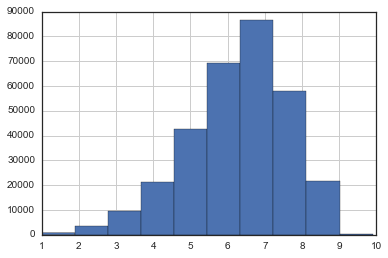

In [85]:
movie_df['Rating'].hist()

Looks good! Can you increase or decrease the number of bins? Find the documentation [here](https://www.google.com/search?client=safari&rls=en&q=pandas+plotting&ie=UTF-8&oe=UTF-8). 

In [109]:
# TODO: try different number of bins. 

A nice to way to explore this is visualizing the "[small multiples](https://www.google.com/search?client=safari&rls=en&q=small+multiples&ie=UTF-8&oe=UTF-8)". It is possible to draw many plots in a single "figure". Read about [subplot](https://www.google.com/search?client=safari&rls=en&q=matplotlib+subplot&ie=UTF-8&oe=UTF-8). For instance, you can do something like:

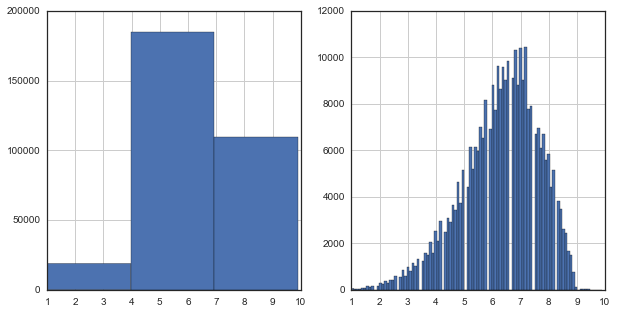

In [127]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
movie_df['Rating'].hist(bins=3)
plt.subplot(1,2,2)
movie_df['Rating'].hist(bins=100)

Ok, so create 8 subplots (2 rows and 4 columns) with the given `binsizes`. 

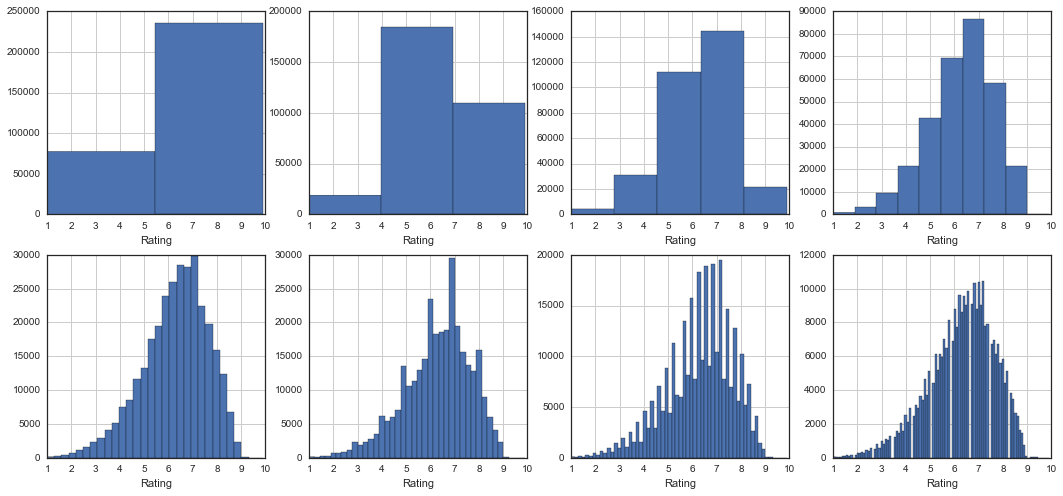

In [136]:
binsizes = [2, 3, 5, 10, 30, 40, 60, 100 ]

plt.figure(1, figsize=(18,8))
for i, bins in enumerate(binsizes): 
    # TODO: use subplot and hist() function to draw 8 plots. 
    plt.subplot(2,4,i+1)
    ax = movie_df['Rating'].hist(bins=bins)
    ax.set_xlabel("Rating")

Do you notice weird patterns that emerge from `bins=40`? Can you guess why do you see such patterns? What are the peaks and what are the empty bars?

In [ ]:
# Provide your answer and evidence here. 

# Q3 Boxplot

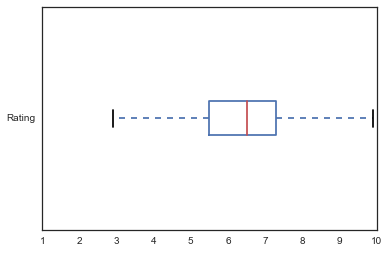

In [137]:
movie_df['Rating'].plot(kind='box', vert=False)

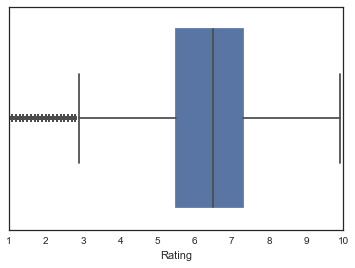

In [138]:
sns.boxplot(movie_df['Rating'])

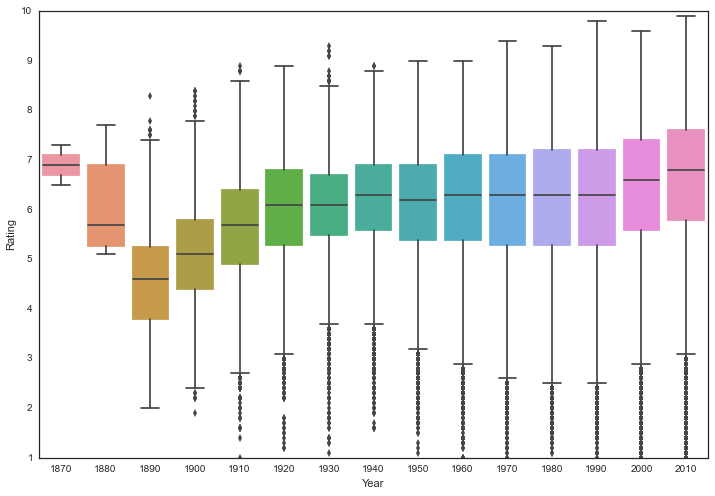

In [166]:
df = movie_df.sort('Year')
ax = sns.boxplot(x=(df['Year']//10)*10, y=df['Rating'])
# sns.stripplot(x=(df['Year']//10)*10, y=df['Rating'], size=4, jitter=True)
ax.figure.set_size_inches(12, 8)

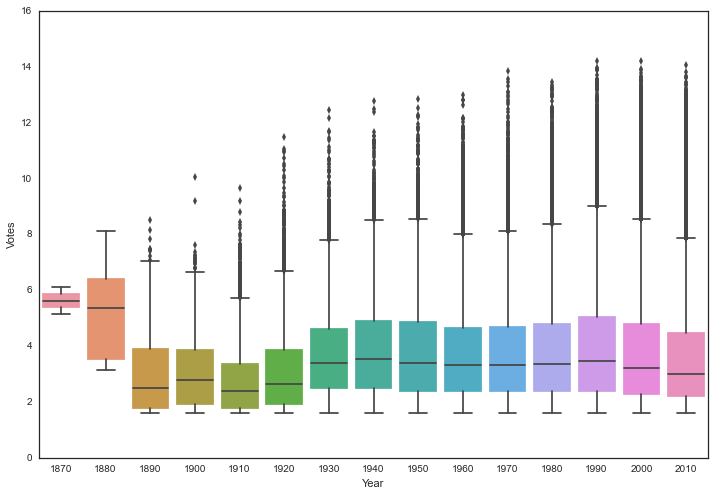

In [165]:
ax = sns.boxplot(x=(df['Year']//10)*10, y=np.log(df['Votes']))
ax.figure.set_size_inches(12, 8)
#sns.boxplot(x=(movie_df['Year']//10)*10, y=np.log(movie_df['Votes']))